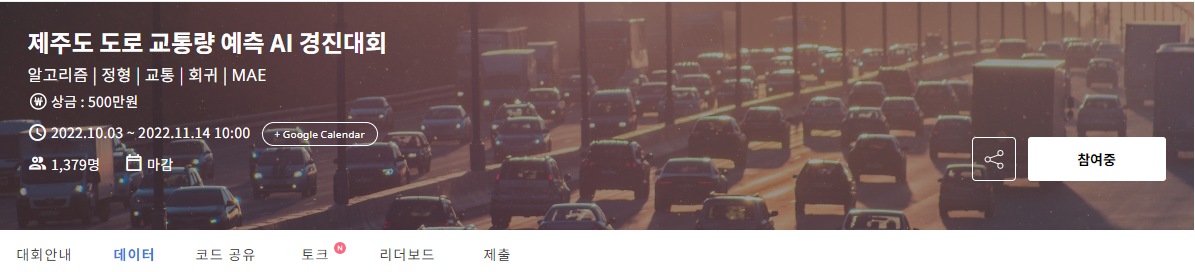

# <제주도 도로 교통량 예측 AI 프로젝트 개시>

## [배경] 
제주도내 주민등록인구는 2022년 기준 약 68만명으로, 연평균 1.3%정도 매년 증가하고 있습니다.

또한 외국인과 관광객까지 고려하면 전체 상주인구는 90만명을 넘을 것으로 추정되며, 

제주도민 증가와 외국인의 증가로 현재 제주도의 교통체증이 심각한 문제로 떠오르고 있습니다.

## [주제]
제주도 도로 교통량 예측 AI 알고리즘 개발

## [설명]
`제주도의 교통 정보로부터 도로 교통량 회귀 예측`



# [Dataset Info.]

### 1. train.csv [파일] 
- 2022년 8월 이전 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)
- 4,701,217개의 데이터
- id : 샘플 별 고유 id
- 날짜, 시간, 교통 및 도로구간 등 정보
- target : 도로의 차량 평균 속도(km)


### 2. test.csv [파일]
- 2022년 8월 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)
- 291,241개의 데이터
- id : 샘플 별 고유 id
- 날짜, 시간, 교통 및 도로구간 등 정보


### 3. data_info.csv [파일]
- 데이터의 각 Column별 추가 설명
- 가급적 pandas 패키지를 이용하여 오픈하는 것을 권장합니다. (엑셀에서 load시 - 한글이 깨져 보일 수 있음)


### 4. sample_submission.csv [제출양식]
- id : 샘플 별 고유 id
- target : 도로의 차량 평균 속도(km)

### 결론

평균속도로 교통량 측정하기.

데이터를 확인한 결과는 다음과 같습니다.

-base_date(날짜) : 2021.09.01 - 2022.07.31

-day_of_week(요일) : 월,화,수,목,금,토,일
<day_of_week>
- 금:              684024
- 수:              675583
- 목:              674070
- 일:              673632
- 토:              669767
- 화:              662498
- 월:              661643




-base_hour(시간대) : 0 - 23

-0:     154158

-3:    155938

-4:   165284

-2:     169322

-5:     181128

-1:     182353

-23:    184229

-6:     189418

-7:     199061

-22:    200629

-8:     201875

-21:    203585

-20:    205059

-9:     205327

-10:    206316

-18:    207500

-17:    208377

-16:    208420

-11:    208515

-19:    209870

-12:    211833

-14:    214182

-13:    214297

-15:    214541

-lane_count(차로수) : 1, 2, 3

-3     790594

-1    1558531

-2    2352092

-road_rating(도로등급) : 103, 106, 107

-road_name(도로이름) : 61 가지의 도로명(일반국도12호선, -(결측치) 등....)

호근로             587
호서중앙로          2819
남조로            6813
아봉로            7342
애원로            7718
             ...   
일반국도11호선     215701
일반국도95호선     248181
일반국도16호선     554510
      -            569463
일반국도12호선    1046092




-multi_linked(중용구간 여부) : 0, 1

-connect_code(연결로 코드) : 0, 103

-maximum_speed_limit(최고속도제한) : 30, 50, 60, 70, 80

-40.0       6790

-30.0     229761

-80.0     700334

-70.0     995077

-50.0    1103682

-60.0    1665573

-vehicle_restricted(통과제한차량) : 0

-weight_restricted(통과제한하중) :0/ 43200/ 32400/ 50000

-50000.0      18677

-32400.0     239305

-43200.0     410361

-0.0        4032874

-height_restricted(통과제한높이) : 0

-road_type(도로유형) : 0, 3

-3     964100

-0    3737117

-start_node_name, end_node_name : 487 도로, 장소명

-CU서귀호근로점             744

-서귀포시 호근동 1838-4      744

-성미가든                 788

-와산리                  881

-외산리사무소               934
                   ...  
-봉개교 시종점            24290

-영주교                24381

-미수2교               26635

-산신주유소              29386

-고성교차로              42169
------------------------------------------
-CU서귀호근로점             587

-서귀포시 호근동 1838-4      744

-서귀포시 서호동 308-6       744

-대흘교차로                788

-외산리사무소               881
                   ...  
-영주교                24370

-미수2교               26621

-구엄교                27510

-산신주유소              29202

-고성교차로              42265

-start_latitude, start_longitude : 586 가지 출발점 위,경도

-end_latitude, end_longitude : : 586 가지 도착점 위,경도


-start_turn_restricted : 있음, 없음


-end_turn_restricted : 있음, 없음



-target : 평균속도(예측해야할 값)

-103.0           1

-98.0            1

-96.0            2

-113.0           2

-112.0           2
          ...  
-51.0          107347

-54.0          108040

-50.0          108822

-49.0          110244

-48.0          112044

### 1. Data Load & Data library Load

data_info에서 떠오르는 생각 & 도메인
1. 위도 경도는 지도 관련 데이터를 넣어야 할듯 싶다.
2. 중용구간의 의미는?
- 도로 노선이 변경되었을 경우, 노선의 변화를시간적으로
관리할 수 있는 이력관리체계가 정립되어 있지 않아 노선변경 전의 위치와 노선변경 후의 위치를 바탕으로 한 해당년도별 도로 관련 정보의 조회 등 도로관리 정보화 사업수행에 어려운 점이 있다. 특히 일반국도는 고속국도에 비해 시가지 우회 도로 개설, 도로의선형 개선 사업 등의 도로의 노선 변화 및 연장 변화가 심하여 합리적인 이력관리체계가 더욱 필요하다. 일반국도의 도로 구간은 전용구간과 중용구간으로 나눌 수 있다. 전용구간이란하나의 노선이 도로를 전적으로 사용하는 구간을 말하며 2개 이상의 노선이 도로의 일정 구간을 공동으로 사용하는 구간을 중용구간이라한다. 2002년 현재 우리나라 전체 일반국도의총 연장은 약 12,420km 정도이며, 이중 약1200km 정도가 2개 이상의 노선이 공동으로 사용하는 중용구간이다.

3. 통과제한하중: 과적으로인한 도로 파괴과적...
4. 통과제한차량: 무게가 우선 부피도 제재도 한다.
5. 도로등급: 도로상태를 보고 정함.
6. 승용차: 1차선~3차선
7. 화물차는 3차선
8. 일반도로/고속도로/추월선(고속도로에서 1차선에서만 가능)
9. 노선: 교통 기관이 통과하는 출발 지점과 목적 지점을 잇는 선이다. 철도 노선, 버스 노선, 항공 노선, 항로 등이 있다.
10. 데이터 조사기간: 2021.09.31 ~ 2022.07.31 거의 1년치인데 관광객을 목표로해서 저 날까기간을 둔가 아닐까? 싶다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib as mpl
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV


plt.rc("font", family="Malgun Gothic")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 제주도 대회 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/머신러닝 프로젝트 with 패스트캠퍼스, 김재승/제주도 도로 교통량 예측 AI 경진대회/"

train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")
submission = pd.read_csv(base_path + "sample_submission.csv")
data_info = pd.read_csv(base_path + "data_info.csv")

In [ ]:
train.head(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
5,TRAIN_0000005,20210913,월,7,2,107,경찰로,0,0,60.0,...,0,시청입구2,33.249949,126.505664,없음,서호2차현대맨션203동,33.252183,126.506069,없음,28.0
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
7,TRAIN_0000007,20211213,월,16,2,107,외도천교,0,0,60.0,...,3,외도천교,33.482392,126.441622,없음,외도천교,33.482332,126.442266,없음,28.0
8,TRAIN_0000008,20211004,월,15,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,14.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0


In [ ]:
train.tail(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
4701207,TRAIN_4701207,20211229,수,21,2,103,일반국도12호선,0,0,50.0,...,0,하귀입구,33.485264,126.410896,없음,미수2교,33.483719,126.405338,없음,51.0
4701208,TRAIN_4701208,20220323,수,19,2,107,-,0,0,80.0,...,3,제2태흥교,33.287356,126.736525,없음,제2태흥교,33.287582,126.737512,없음,61.0
4701209,TRAIN_4701209,20210909,목,10,1,103,일반국도11호선,0,0,60.0,...,3,윤고교,33.348305,126.614293,없음,윤고교,33.348691,126.614599,없음,48.0
4701210,TRAIN_4701210,20220105,수,14,1,107,관광단지로,0,0,30.0,...,0,산신주유소,33.255215,126.414236,없음,관광단지입구,33.258119,126.415840,없음,25.0
4701211,TRAIN_4701211,20211230,목,14,1,103,일반국도16호선,0,0,50.0,...,0,우사,33.358358,126.271652,없음,상명,33.359839,126.267783,없음,27.0
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0
4701216,TRAIN_4701216,20211019,화,6,2,107,경찰로,0,0,60.0,...,0,서귀포경찰서,33.256785,126.508940,없음,시민공원,33.257130,126.510364,없음,35.0


In [ ]:
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [ ]:
train.shape

(4701217, 23)

In [ ]:
train.info()
#데이터가 큰 경우 non_null 데이터 안나오기도 한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [ ]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [ ]:
test

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,20220827,토,5,1,103,일반국도16호선,0,0,80.0,...,0.0,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음
291237,TEST_291237,20220819,금,20,2,103,일반국도11호선,0,0,60.0,...,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음
291238,TEST_291238,20220805,금,11,1,107,신대로,0,0,30.0,...,0.0,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음
291239,TEST_291239,20220812,금,7,2,107,경찰로,0,0,60.0,...,0.0,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음


In [ ]:
test.shape

(291241, 22)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

### 2. Data_processing
1. 결측치 처리 및 이상치 데이터 처리
2. Feature selection(분석에 사용하지 않을 column 제거)


In [ ]:
# train 데이터에서 결측치 및 이상치 데이터 처리
# train[train.isnull().any(axis=1)]
test[test.isnull().any(axis=1)]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted


In [ ]:
train[train=='-'] = np.nan

In [ ]:
train.isnull().sum()

id                            0
base_date                     0
day_of_week                   0
base_hour                     0
lane_count                    0
road_rating                   0
road_name                569463
multi_linked                  0
connect_code                  0
maximum_speed_limit           0
vehicle_restricted            0
weight_restricted             0
height_restricted             0
road_type                     0
start_node_name               0
start_latitude                0
start_longitude               0
start_turn_restricted         0
end_node_name                 0
end_latitude                  0
end_longitude                 0
end_turn_restricted           0
target                        0
dtype: int64

In [ ]:
train.duplicated(["road_name"]).value_counts()
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,NaN,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,NaN,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [ ]:
# road_name은 최빈값으로 처리함.
train["road_name"].fillna(train["road_name"].mode()[0], inplace=True)

In [ ]:
train.head(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
5,TRAIN_0000005,20210913,월,7,2,107,경찰로,0,0,60.0,...,0,시청입구2,33.249949,126.505664,없음,서호2차현대맨션203동,33.252183,126.506069,없음,28.0
6,TRAIN_0000006,20220106,목,0,2,107,일반국도12호선,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
7,TRAIN_0000007,20211213,월,16,2,107,외도천교,0,0,60.0,...,3,외도천교,33.482392,126.441622,없음,외도천교,33.482332,126.442266,없음,28.0
8,TRAIN_0000008,20211004,월,15,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,14.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0


In [ ]:
train["base_date"].sort_values()

430379     20210901
369019     20210901
1132647    20210901
4543127    20210901
3428956    20210901
             ...   
2053638    20220731
2748124    20220731
2447938    20220731
3749761    20220731
4680098    20220731
Name: base_date, Length: 4701217, dtype: int64

In [ ]:
train.corr()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_date,1.000000,-0.008645,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
base_hour,-0.008645,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
lane_count,0.011463,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.018547,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.000832,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.010633,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.018713,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.011030,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


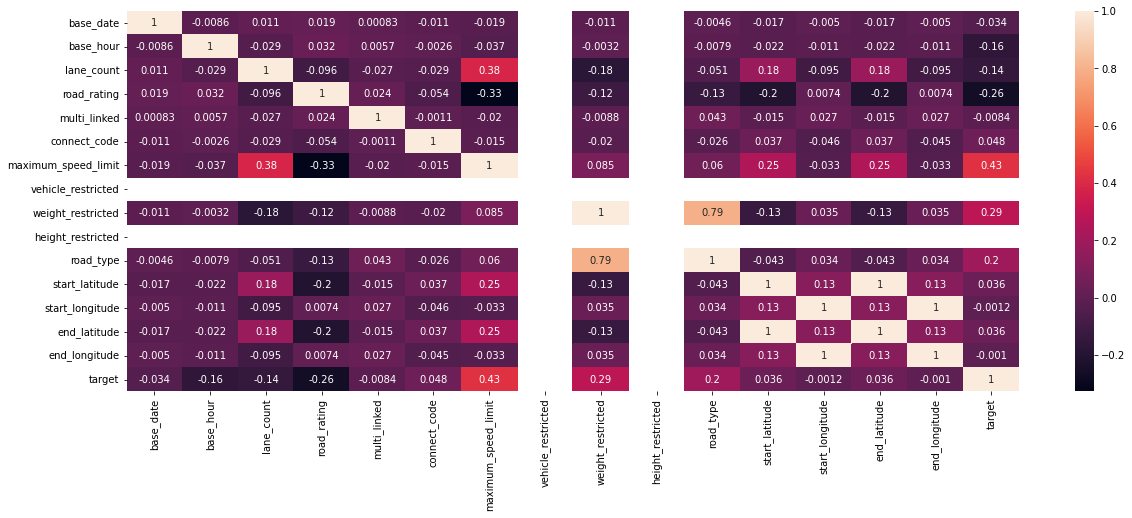

In [ ]:
plt.figure(figsize = (20,7))
sns.heatmap(train.corr(), annot = True)

In [ ]:
train[["base_date", "day_of_week", "base_hour", "lane_count", "maximum_speed_limit", "weight_restricted", "height_restricted", "road_type", "road_name", "start_node_name", "end_node_name"]]

,base_date,day_of_week,base_hour,lane_count,maximum_speed_limit,weight_restricted,height_restricted,road_type,road_name,start_node_name,end_node_name
0,20220623,목,17,1,60.0,32400.0,0.0,3,지방도1112호선,제3교래교,제3교래교
1,20220728,목,21,2,60.0,0.0,0.0,0,일반국도11호선,광양사거리,KAL사거리
2,20211010,일,7,2,80.0,0.0,0.0,0,일반국도16호선,창고천교,상창육교
3,20220311,금,13,2,50.0,0.0,0.0,0,태평로,남양리조트,서현주택
4,20211005,화,8,2,80.0,0.0,0.0,0,일반국도12호선,애월샷시,애월입구
...,...,...,...,...,...,...,...,...,...,...,...
4701212,20211104,목,16,1,50.0,0.0,0.0,0,일반국도12호선,대림사거리,금덕해운
4701213,20220331,목,2,2,80.0,43200.0,0.0,3,일반국도12호선,광삼교,광삼교
4701214,20220613,월,22,2,60.0,0.0,0.0,0,일반국도12호선,고성교차로,성산교차로
4701215,20211020,수,2,2,80.0,0.0,0.0,0,일반국도95호선,제6광령교,관광대학입구


In [ ]:
train.groupby('road_name').mean().sort_values("target")

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
road_name,,,,,,,,,,,,,,,,
삼무로,2.021643e+07,11.596577,2.000000,107.000000,0.000000,0.000000,50.000000,0.0,0.000000,0.0,0.000000,33.490009,126.488356,33.490009,126.488355,15.159959
삼봉로,2.021728e+07,12.779953,2.000000,107.000000,0.000000,0.000000,60.000000,0.0,0.000000,0.0,0.000000,33.520626,126.587664,33.520605,126.587674,17.024911
서사로,2.021699e+07,11.822046,1.749720,107.000000,0.000000,0.000000,44.994407,0.0,0.000000,0.0,0.000000,33.497883,126.519833,33.497881,126.519833,19.396394
신광로,2.021643e+07,11.621369,2.000000,107.000000,0.000000,0.000000,50.000000,0.0,0.000000,0.0,0.000000,33.491132,126.490200,33.491142,126.490200,19.435402
연동로,2.021692e+07,11.554496,2.000000,107.000000,0.000000,0.000000,50.000000,0.0,0.000000,0.0,0.000000,33.485930,126.488192,33.485930,126.488195,22.564200
한천로,2.021692e+07,11.592416,1.000000,107.000000,0.000000,0.000000,60.000000,0.0,0.000000,0.0,0.000000,33.501620,126.508626,33.501610,126.508606,22.745260
연북로,2.021692e+07,11.528488,1.999587,107.000000,0.000000,0.000000,39.995865,0.0,0.000000,0.0,0.000000,33.488763,126.542018,33.488764,126.542019,23.679980
동문로,2.021698e+07,12.555032,1.000000,107.000000,0.000000,0.000000,50.000000,0.0,0.000000,0.0,0.000000,33.250494,126.564736,33.250851,126.564154,23.898236
임항로,2.021638e+07,12.052819,2.000000,107.000000,0.000000,0.000000,70.000000,0.0,0.000000,0.0,0.000000,33.516756,126.527597,33.516754,126.527711,24.515212


In [ ]:
train.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,2.021672e+07,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,4.555709e+03,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,2.021090e+07,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


In [ ]:
# 이 변수를 지운 이유는 1. 교통량을 모델링하는데 직접적으로 관여x, 국토해양부 자료기준에 의거 형식상 표시이기에 관여는 x
train = train.drop(columns = ["road_rating", "start_latitude", "start_longitude", "end_latitude", "end_longitude", "connect_code", "road_rating", "connect_code", "height_restricted","multi_linked","start_latitude", "start_turn_restricted", "end_latitude", "end_longitude", "end_turn_restricted"])

In [ ]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_name,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,start_node_name,end_node_name,target
0,TRAIN_0000000,20220623,목,17,1,지방도1112호선,60.0,0.0,32400.0,3,제3교래교,제3교래교,52.0
1,TRAIN_0000001,20220728,목,21,2,일반국도11호선,60.0,0.0,0.0,0,광양사거리,KAL사거리,30.0
2,TRAIN_0000002,20211010,일,7,2,일반국도16호선,80.0,0.0,0.0,0,창고천교,상창육교,61.0
3,TRAIN_0000003,20220311,금,13,2,태평로,50.0,0.0,0.0,0,남양리조트,서현주택,20.0
4,TRAIN_0000004,20211005,화,8,2,일반국도12호선,80.0,0.0,0.0,0,애월샷시,애월입구,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,일반국도12호선,50.0,0.0,0.0,0,대림사거리,금덕해운,20.0
4701213,TRAIN_4701213,20220331,목,2,2,일반국도12호선,80.0,0.0,43200.0,3,광삼교,광삼교,65.0
4701214,TRAIN_4701214,20220613,월,22,2,일반국도12호선,60.0,0.0,0.0,0,고성교차로,성산교차로,30.0
4701215,TRAIN_4701215,20211020,수,2,2,일반국도95호선,80.0,0.0,0.0,0,제6광령교,관광대학입구,73.0


In [ ]:
# nominal 데이터 인데 labelEncoder를 사용했음.
from sklearn.preprocessing import LabelEncoder

items =  ['day_of_week', 'road_name', 'start_node_name', 'end_node_name']
train_encoding = train.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(train_encoding[i])
    train_encoding[i] = encoder.transform(train_encoding[i])

print(train_encoding)

                    id  base_date  day_of_week  base_hour  lane_count  \
0        TRAIN_0000000   20220623            1         17           1   
1        TRAIN_0000001   20220728            1         21           2   
2        TRAIN_0000002   20211010            4          7           2   
3        TRAIN_0000003   20220311            0         13           2   
4        TRAIN_0000004   20211005            6          8           2   
...                ...        ...          ...        ...         ...   
4701212  TRAIN_4701212   20211104            1         16           1   
4701213  TRAIN_4701213   20220331            1          2           2   
4701214  TRAIN_4701214   20220613            3         22           2   
4701215  TRAIN_4701215   20211020            2          2           2   
4701216  TRAIN_4701216   20211019            6          6           2   

         road_name  maximum_speed_limit  vehicle_restricted  \
0               45                 60.0                 0.0 

In [ ]:
train_encoding

,id,base_date,day_of_week,base_hour,lane_count,road_name,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,start_node_name,end_node_name,target
0,TRAIN_0000000,20220623,1,17,1,45,60.0,0.0,32400.0,3,386,386,52.0
1,TRAIN_0000001,20220728,1,21,2,33,60.0,0.0,0.0,0,32,2,30.0
2,TRAIN_0000002,20211010,4,7,2,35,80.0,0.0,0.0,0,426,179,61.0
3,TRAIN_0000003,20220311,0,13,2,56,50.0,0.0,0.0,0,58,203,20.0
4,TRAIN_0000004,20211005,6,8,2,34,80.0,0.0,0.0,0,267,269,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,1,16,1,34,50.0,0.0,0.0,0,79,42,20.0
4701213,TRAIN_4701213,20220331,1,2,2,34,80.0,0.0,43200.0,3,31,31,65.0
4701214,TRAIN_4701214,20220613,3,22,2,34,60.0,0.0,0.0,0,19,214,30.0
4701215,TRAIN_4701215,20211020,2,2,2,36,80.0,0.0,0.0,0,392,23,73.0


In [ ]:
# one-hot_encoding
# pd.get_dummies(train, columns=["road_name", "day_of_week", "base_hour", ""])

train1 = train[["day_of_week","base_hour", "road_name", "road_type" ,"target"]]
train1_dummy = pd.get_dummies(train1, columns=["day_of_week","base_hour", "road_name", "road_type", "target"])


In [ ]:
# 다중회귀분석으로 학습을 시킴.
X_train = train_encoding.drop(columns= ["target", "id"])
y_train= train_encoding["target"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr = LinearRegression()
lr.fit(X_train, y_train)
print("accuracy_score:",lr.score(X_train, y_train))

accuracy_score: 0.3604820250332693


# test

In [ ]:
test = test.drop(columns = ["road_rating", "start_latitude", "start_longitude", "end_latitude", "end_longitude", "connect_code", "road_rating", "connect_code", "height_restricted","multi_linked","start_latitude", "start_turn_restricted", "end_latitude", "end_longitude", "end_turn_restricted"])

In [ ]:
from sklearn.preprocessing import LabelEncoder

items =  ['day_of_week', 'road_name', 'start_node_name', 'end_node_name']
test_encoding = test.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(test_encoding[i])
    test_encoding[i] = encoder.transform(test_encoding[i])

print(test_encoding)

                 id  base_date  day_of_week  base_hour  lane_count  road_name  \
0       TEST_000000   20220825            1         17           3         27   
1       TEST_000001   20220809            6         12           2         30   
2       TEST_000002   20220805            0          2           1         31   
3       TEST_000003   20220818            1         23           3         29   
4       TEST_000004   20220810            2         17           3         11   
...             ...        ...          ...        ...         ...        ...   
291236  TEST_291236   20220827            5          5           1         31   
291237  TEST_291237   20220819            0         20           2         29   
291238  TEST_291238   20220805            0         11           1         20   
291239  TEST_291239   20220812            0          7           2          1   
291240  TEST_291240   20220812            0         10           3         40   

        maximum_speed_limit

In [ ]:
# test_다중회귀분석으로 학습을 시킴.
X_test = test_encoding.drop(columns= ["id"])

In [ ]:
X_test

,base_date,day_of_week,base_hour,lane_count,road_name,maximum_speed_limit,vehicle_restricted,weight_restricted,road_type,start_node_name,end_node_name
0,20220825,1,17,3,27,70.0,0.0,0.0,0,79,208
1,20220809,6,12,2,30,70.0,0.0,0.0,3,211,9
2,20220805,0,2,1,31,60.0,0.0,0.0,0,45,45
3,20220818,1,23,3,29,70.0,0.0,0.0,0,129,180
4,20220810,2,17,3,11,70.0,0.0,0.0,0,73,72
...,...,...,...,...,...,...,...,...,...,...,...
291236,20220827,5,5,1,31,80.0,0.0,0.0,0,168,41
291237,20220819,0,20,2,29,60.0,0.0,0.0,0,140,230
291238,20220805,0,11,1,20,30.0,0.0,0.0,0,59,227
291239,20220812,0,7,2,1,60.0,0.0,0.0,0,16,176


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score
# model = LinearRegression()
# lr = model.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# model_score =  accuracy_score(y_pred)
# # print("accuracy_score:",lr.score(X_test))

In [ ]:
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold as kfold
# from sklearn.ensemble import LGBMRegressor
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures


In [ ]:

# 연속적인 값인 만큼 stratify kfold 를 사용할 수 없지만 나누는 것은 kfold와 동일합니다.
kf = kfold(n_splits = 3, shuffle = True, random_state = 42)
split = kf.split(X_train, y_train)

# 평균 mae를 확인하기 위한 리스트
mae_list1 = []
mae_list2 = []

# 폴드별 예측값 저장을 위한 리스트
test_pred_list1 = []
test_pred_list2 = []

# for train, test in split:
    # x_train, x_val, y_train, y_val = X_train.iloc[train], X_train.iloc[test], y_train.iloc[train], y_train.iloc[test]    

rf = XGBRegressor(n_estimators=40, min_samples_leaf=10,
                                min_samples_split=10, random_state=2022)
    # et = LGBMRegressor(n_estimators = 40, min_samples_split=10, min_samples_leaf = 10, random_state = 2022)

# ct = CatBoostRegressor(n_estimators=40, min_samples_leaf=10,in_samples_split=10, random_state=2022)  

ct = CatBoostRegressor(n_estimators = 200,loss_function = 'MAE', eval_metric = 'RMSE')

rf.fit(x_train, y_train)
ct.fit(x_train, y_train)

pred1 = rf.predict(x_val)
pred2 = ct.predict(x_val)

result1 = mean_absolute_error(pred1,y_val)
result2 = mean_absolute_error(pred2,y_val)

mae_list1.append(result1)
mae_list2.append(result2)

print(f'XGBRegressor mae : {result1:.4f}', end='\n\n')
print(f'CatRegressor mae : {result2:.4f}', end='\n\n')

test_pred_list1.append(rf.predict(X_test))
test_pred_list2.append(ct.predict(X_test))

print(f'mean mae {np.mean(mae_list1):.4f}')
print(f'mean mae {np.mean(mae_list2):.4f}')

[06:08:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0:	learn: 15.7271582	total: 1.2s	remaining: 3m 58s
1:	learn: 15.5095780	total: 2.27s	remaining: 3m 44s
2:	learn: 15.3018387	total: 3.26s	remaining: 3m 34s
3:	learn: 15.1044281	total: 4.24s	remaining: 3m 27s
4:	learn: 14.9262643	total: 5.2s	remaining: 3m 22s
5:	learn: 14.7477211	total: 6.17s	remaining: 3m 19s
6:	learn: 14.5707176	total: 7.09s	remaining: 3m 15s
7:	learn: 14.4093198	total: 7.67s	remaining: 3m 4s
8:	learn: 14.2529073	total: 8.23s	remaining: 2m 54s
9:	learn: 14.1000663	total: 8.79s	remaining: 2m 46s
10:	learn: 13.9616121	total: 9.33s	remaining: 2m 40s
11:	learn: 13.8283726	total: 9.89s	remaining: 2m 34s
12:	learn: 13.7023891	total: 10.4s	remaining: 2m 30s
13:	learn: 13.5785105	total: 11s	remaining: 2m 26s
14:	learn: 13.4498051	total: 11.6s	remaining: 2m 22s
15:	learn: 13.3281351	total: 12.1s	remaining: 2m 19s
16:	learn: 13.2120910	total: 12.7s	remai

In [ ]:
pred_last2 = (test_pred_list2[0]) 

NameError: ignored

In [ ]:
submission["target"] = pred_last
submission.to_csv("./final_jeju_AI.csv", index=False)

submission

,id,target
0,TEST_000000,31.265728
1,TEST_000001,41.747787
2,TEST_000002,38.505320
3,TEST_000003,37.615575
4,TEST_000004,38.982988
...,...,...
291236,TEST_291236,53.037429
291237,TEST_291237,28.339671
291238,TEST_291238,25.954808
291239,TEST_291239,27.847578


In [ ]:
feature_names = X_train.columns
xgb_val.feature_importances_
sorted_idx = xgb_val.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], xgb_val.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

NameError: ignored

### EDA_시각화

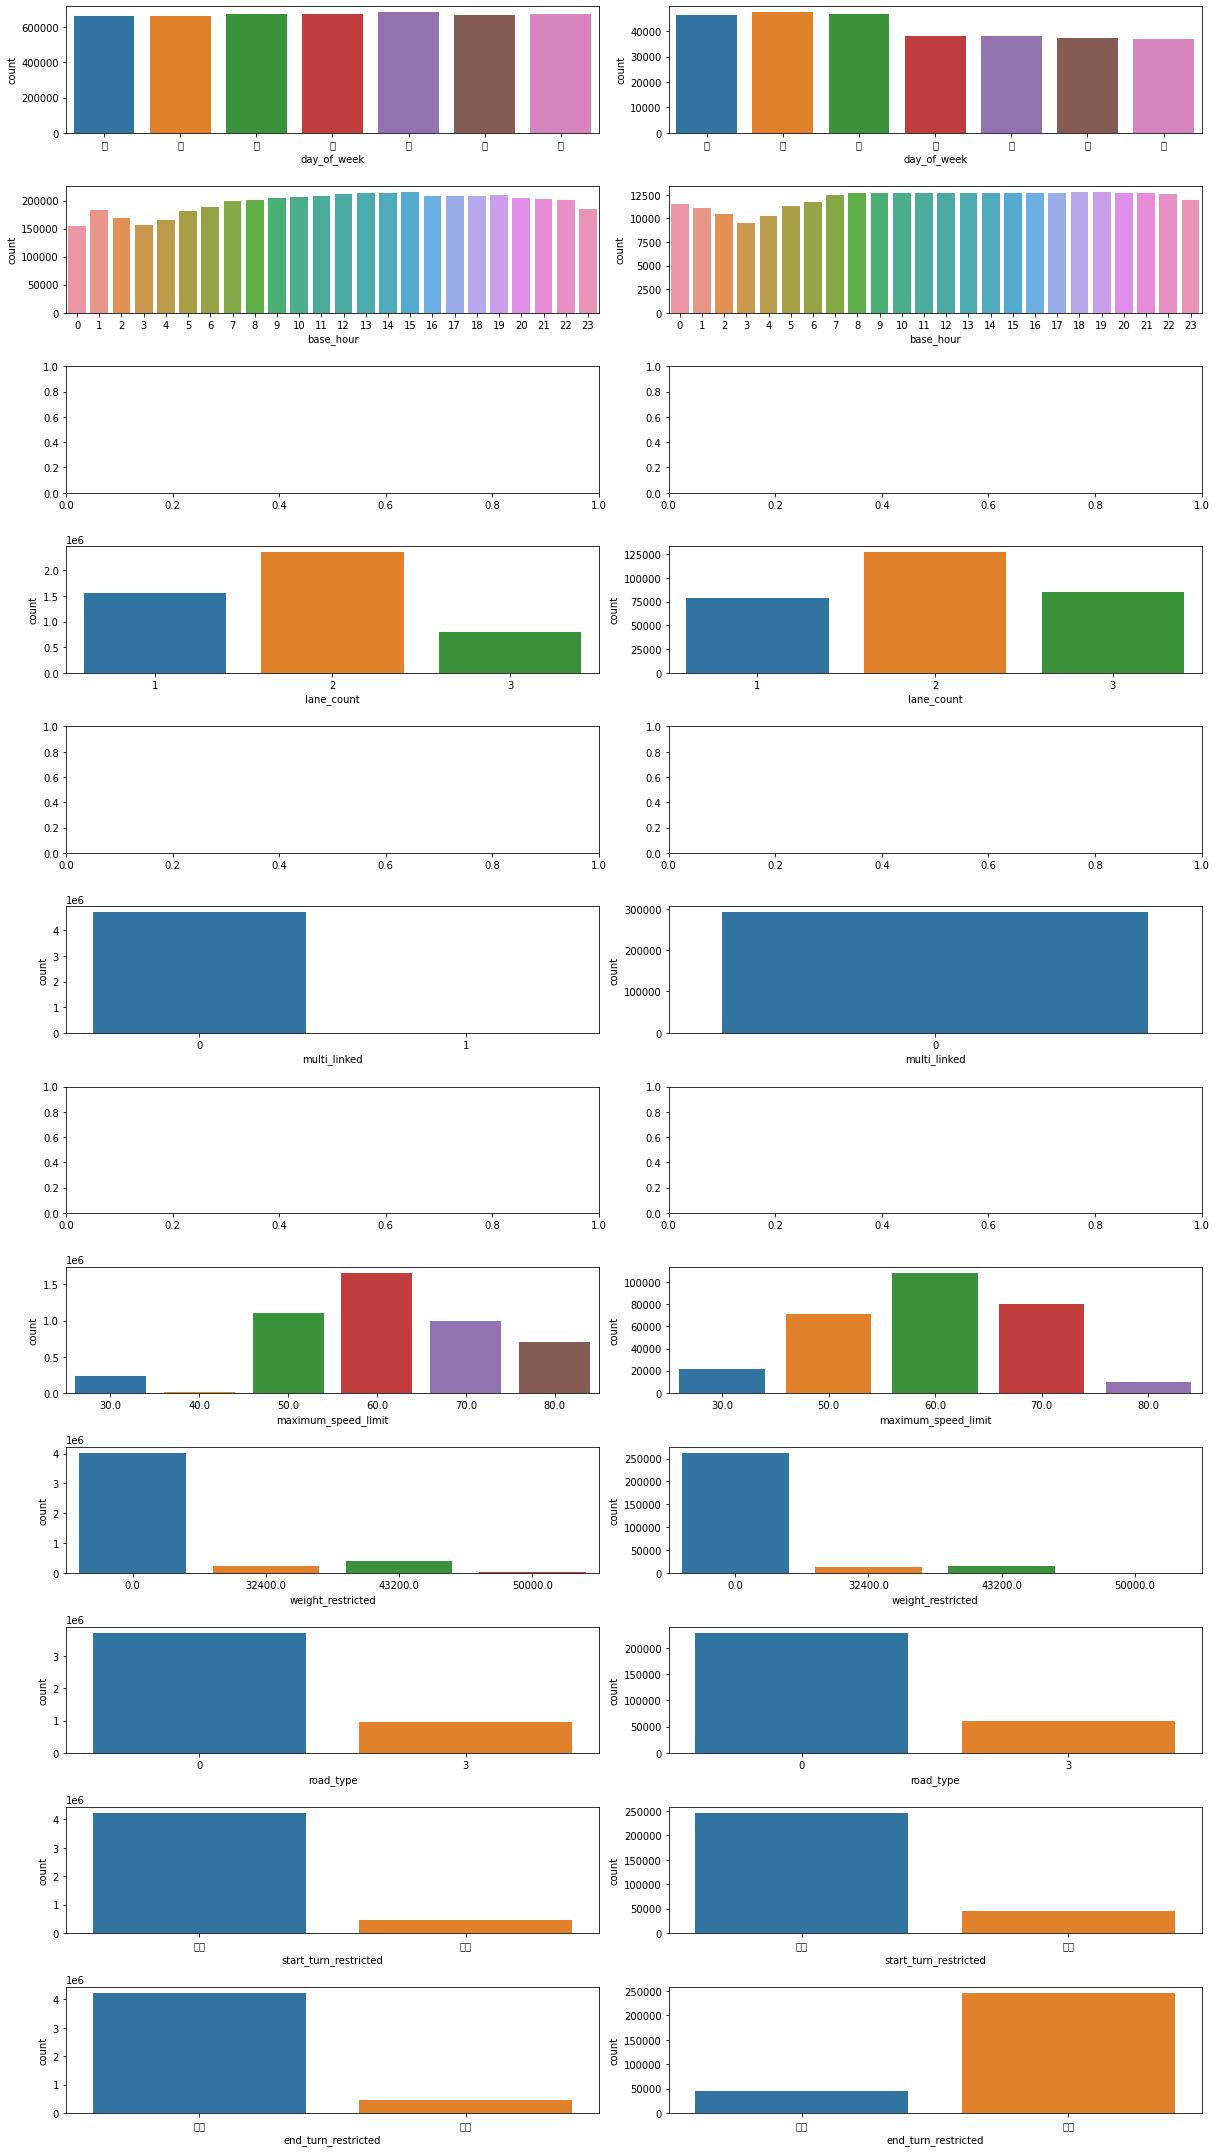

In [ ]:
date_order = ['월','화','수','목','금','토','일']
fig, axes = plt.subplots(12, 2, figsize=(17,30))

sns.countplot(x='day_of_week', data=train, ax=axes[0][0],order=date_order)
sns.countplot(x='day_of_week', data=test, ax=axes[0][1],order=date_order)
sns.countplot(x='base_hour', data=train, ax=axes[1][0])
sns.countplot(x='base_hour', data=test, ax=axes[1][1])
sns.countplot(x='lane_count', data=train, ax=axes[3][0])
sns.countplot(x='lane_count', data=test, ax=axes[3][1])
sns.countplot(x='multi_linked', data=train, ax=axes[5][0])
sns.countplot(x='multi_linked', data=test, ax=axes[5][1])
sns.countplot(x='maximum_speed_limit', data=train, ax=axes[7][0])
sns.countplot(x='maximum_speed_limit', data=test, ax=axes[7][1])
sns.countplot(x='weight_restricted', data=train, ax=axes[8][0])
sns.countplot(x='weight_restricted', data=test, ax=axes[8][1])
sns.countplot(x='road_type', data=train, ax=axes[9][0])
sns.countplot(x='road_type', data=test, ax=axes[9][1])
sns.countplot(x='start_turn_restricted', data=train, ax=axes[10][0])
sns.countplot(x='start_turn_restricted', data=test, ax=axes[10][1])
sns.countplot(x='end_turn_restricted', data=train, ax=axes[11][0])
sns.countplot(x='end_turn_restricted', data=test, ax=axes[11][1])

plt.tight_layout()
plt.show()

# - day_of_week: train 세트는 요일별 데이터가 일정, test 세트는 월화수가 비교적 많이 집계됨.
# - base_hour: 일정함.
# - road_in_use: 일정함.
# - lane_count: train 세트는 1차로 2차로, test 세트는 3차로가 더 많음.
# - road_rating: test 세트는 3등급 도로가 더 많이 집계됨.
# - multi_linked: test 세트에는 1 값이 존재하지 않음.
# - connect_code: test 세트에는 103 값이 존재하지 않음.
# - maximum_speed_limit: test 세트에는 40이 존재하지 않음.
# - weight_restricted: 일정함.
# - road_type: 교량타입이 4배 더 많음.
# - start_turn_restricted: 일정함.
# - end_turn_restricted: 일정함.

In [ ]:
def print_mode(train, col):

  cnt = Counter(train[col])
  list_cnt = cnt.most_common(3)

print(f'{col}의 최빈값 {idx+1}순위 : {value[0]} & {value[-1]}개')

NameError: ignored

In [ ]:
train = train.copy()
train['freq'] = train1.groupby('road_name')['road_name'].transform('count')
train = train1[['road_name','freq']]
train = train1.groupby('road_name').mean().reset_index()
train.plot.bar(x='road_name',y='freq',figsize=(20,3))
plt.show()

In [ ]:
test = test.copy()
test['freq'] = test.groupby('road_name')['road_name'].transform('count')
test = test[['road_name','freq']]
test = test.groupby('road_name').mean().reset_index()
test.plot.bar(x='road_name',y='freq',figsize=(20,3))
plt.show()

In [ ]:
# 그룹화
train_date = train[['base_date','target']]
train_date = train_date.groupby('base_date').mean().reset_index()

train_time = train[['base_hour','target']]
train_time = train_time.groupby('base_hour').mean().reset_index()

train_day = train[['day_of_week','target']]
train_day = train_day.groupby('day_of_week').mean()
train_day = train_day.reindex(['월','화','수','목','금','토','일']).reset_index()

train_name = train[['road_name','target']]
train_name = train_name.groupby('road_name').mean().reset_index()

In [ ]:
fig, axes = plt.subplots(4, figsize=(15,12))

sns.lineplot(x='base_date',y='target',data=train_date,ax=axes[0]).set(title='base_date vs target')
sns.lineplot(x='base_hour',y='target',data=train_time,ax=axes[1]).set(title='base_hour vs target')
sns.lineplot(x='day_of_week',y='target',data=train_day,ax=axes[2]).set(title='day_of_week vs target')
sns.barplot(x='road_name',y='target',data=train_name,ax=axes[3]).set(title='road_name vs target')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
train['year']= train['base_date'].dt.year
train['month']= train['base_date'].dt.month
train['day']= train['base_date'].dt.day

fig, axes = plt.subplots(3, figsize=(15,8))

sns.lineplot(x='year',y='target',data=train,ax=axes[0]).set(title='year vs target')
sns.lineplot(x='month',y='target',data=train,ax=axes[1]).set(title='month vs target')
sns.lineplot(x='day',y='target',data=train,ax=axes[2]).set(title='day vs target')

plt.tight_layout()
plt.show()

In [ ]:
def print_statistics(train, col):

  max = train['target'].max()
  min = train['target'].min()
  mean = train['target'].mean()
  median = train['target'].median()

  print(f'{col}의 최대값 : {max}')
  print(f'{col}의 최소값 : {min}')
  print(f'{col}의 평균값 : {mean}')
  print(f'{col}의 중앙값 : {median}')
  print_mode(train, col)

In [ ]:
def identify_hist(train, col):

  sns.histplot(data=train[col], kde=True)
  print_statistics(train, col)

In [ ]:
def identify_count(train, col, target='target'):

  print(train[col].value_counts())

  sns.countplot(data=train, x=col)
  plt.show()

In [ ]:
def value_hist(train, col, target='target'):

  for value in train[col].unique():

    cond = (train[col]==value)
    cond_df = train.loc[cond]

    print(f'{value} 데이터 갯수 : {cond_df.shape[0]}')

    print_statistics(cond_df, target)

    fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

    sns.histplot(data=cond_df, x='target', ax=ax[0])
    ax[0].set_title(f'{col}의 {value} 히스토그램')
    ax[0].set_xticks(range(0,int(train[target].max()+1)), 20)

    sns.boxplot(data=cond_df, x='target', ax=ax[1])
    ax[1].set_title(f'{col}의 {value} Box Plot')
    
    plt.show()

In [ ]:
# target 히스토그램 & box plot
identify_hist(train, 'target')

NameError: ignored

In [ ]:
sns.boxplot(data=train['target'])

In [ ]:
# 요일분포 나중에 스케일링 작업이 필요함.
identify_count(train, 'day_of_week')


In [ ]:
value_hist(train,'day_of_week')

In [ ]:
# 시간대 분포
identify_count(train, 'base_hour')

In [ ]:
# 도로사용여부는 아예 데이터가 없네..

In [ ]:
#차로수 분포
identify_count(train, 'lane_count')

In [ ]:
# 중용구간여부 분포
identify_count(train, 'multi_linked')

In [ ]:
# 최고제한속도
identify_count(train, 'maximum_speed_limit')

In [ ]:
sns.distplot(train.maximum_speed_limit)

In [ ]:
identify_count(train, 'weight_restricted')

In [ ]:
sns.boxplot(x = "maximum_speed_limit", y = "target", data = train)

In [ ]:
identify_count(train, 'height_restricted')

In [ ]:
identify_count(train, 'road_type')

In [ ]:
identify_count(train, 'start_turn_restricted')

In [ ]:
identify_count(train, 'end_turn_restricted')

In [ ]:
identify_count(train, 'vehicle_restricted')

In [ ]:
sns.histplot(x = train.target, hue = train.lane_count, palette=["C0", "C1", "k"])

In [ ]:
sns.boxplot(x = train.lane_count, y = train.target)

In [ ]:
sns.boxplot(x='weight_restricted', y="target", data=train)

In [ ]:
train.groupby("weight_restricted")["target"].mean()

In [ ]:
train.groupby("multi_linked")["target"].hist()

In [ ]:
print(train.groupby("multi_linked")["target"].mean())
print(train.groupby("multi_linked")["target"].std())

In [ ]:
sns.boxplot(x = "multi_linked", y = "target", data = train, hue = "road_type")

In [ ]:
sns.pointplot(data = train, x = "weight_restricted", y = "target", hue= "maximum_speed_limit")

In [ ]:
value_hist(train, 'lane_count')

In [ ]:
value_hist(train, 'multi_linked')

In [ ]:
value_hist(train, 'maximum_speed_limit')

In [ ]:
value_hist(train, 'weight_restricted')

In [ ]:
value_hist(train, 'height_restricted')

In [ ]:
value_hist(train, 'road_type')

In [ ]:
value_hist(train, 'start_turn_restricted')

In [ ]:
value_hist(train, 'end_turn_restricted')

In [ ]:
value_hist(train, 'vehicle_restricted')

In [ ]:
value_hist(train, 'vehicle_restricted')

NameError: ignored